### Written by Federica B. Bianco @fedhere
### NYU CUSP PUI
### Assignment 1 Homework 3
### This is a skeleton & instruction notebook
- ### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ### Describe the behavior you see in the plots in terms of the law of large numbers.
- ### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means            

## All extra credits are in Figure 4s

In [303]:
from __future__ import print_function
__author__= 'fbb'

import matplotlib.pylab as plt
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
from scipy.stats import norm

plt.style.use('ggplot')
%matplotlib inline

## choose which distributions to use 

In [304]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [305]:
mymean = 100
mystd = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

![numpy](numpy_chisq.png)


In [306]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

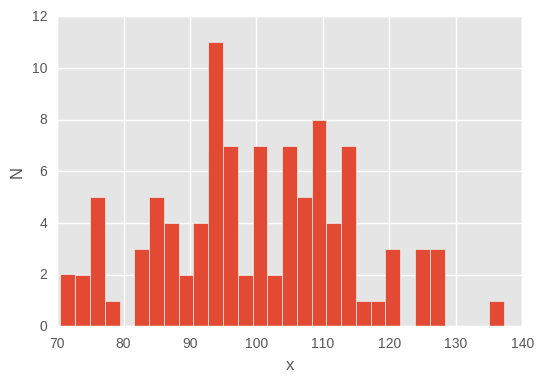

In [307]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
plt.hist(md['chisq'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [308]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.14, standard deviation: 14.28


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [309]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


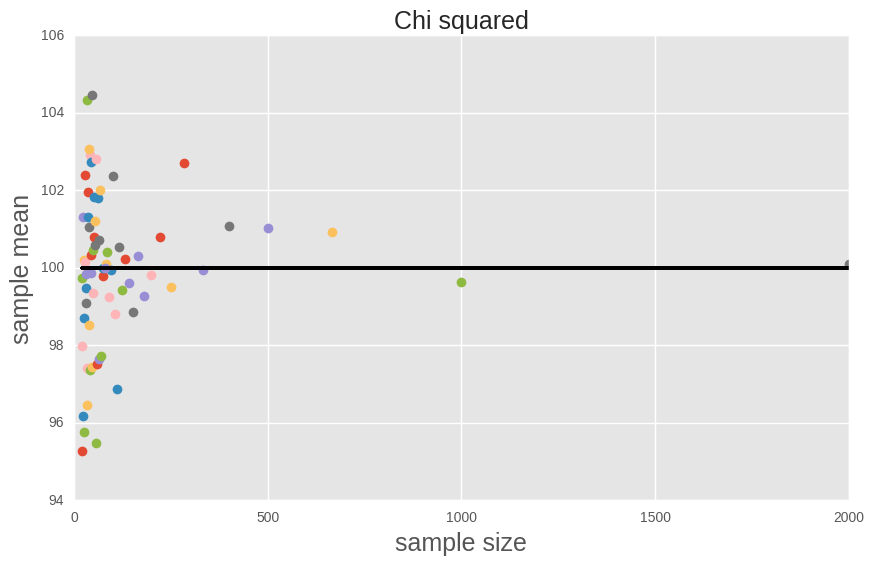

In [310]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: I could see that in chi-square distribution, when the sample size gets bigger, the sample mean is also getting closer to the degree of freedom which is the population mean: 100. And the law of large numbers is that the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed so when the sample size gets bigger, the average of the results are going to be close to the expected value, which is the degree of freedom.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

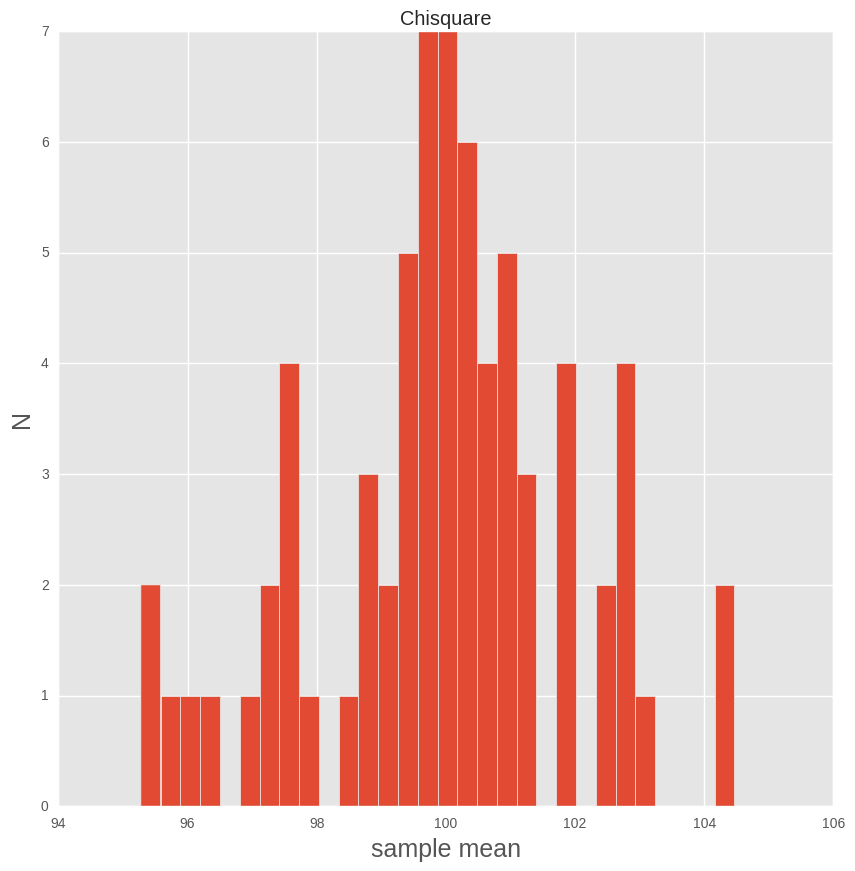

In [311]:
allmeans = list(md['chisq']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Chisquare')
plt.show()

## Figure 3: The most frequent sample mean is in the range between 96 and 102 which is close to 100, the degree of freedom.

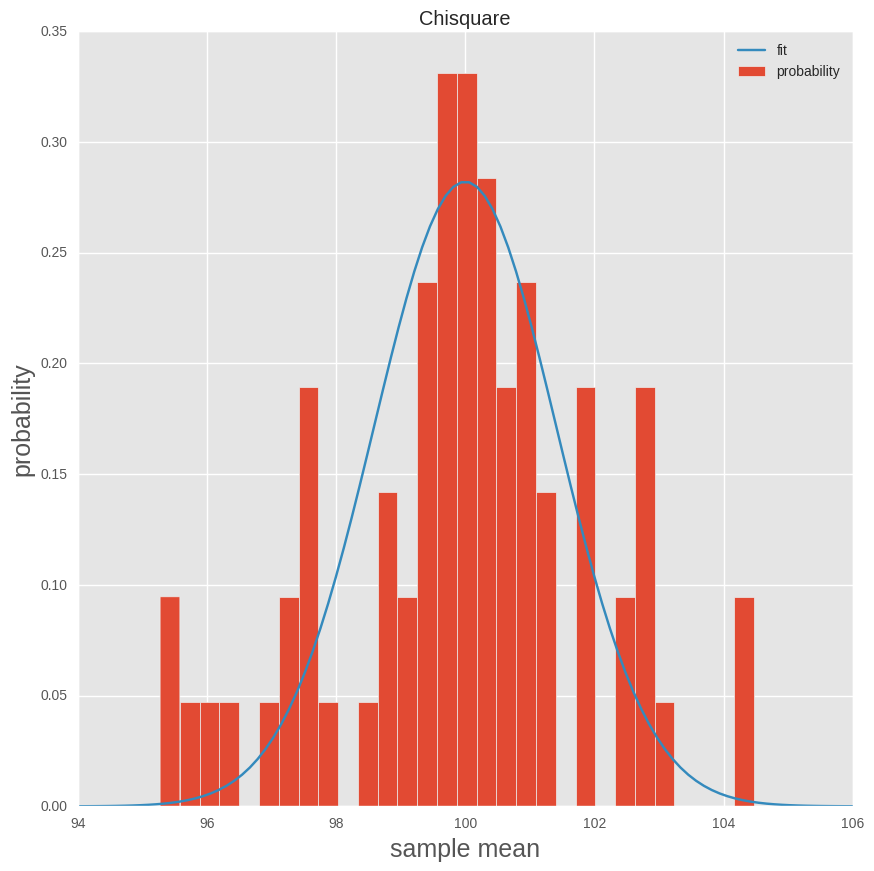

In [313]:
plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30,normed=True,label='probability')
xmin, xmax = plt.xlim()

# Due to the central limit theory, the sample means apply to N(population mean, population std/square of N)
x = np.linspace(xmin,xmax,100)
y = norm.pdf(x,mymean,np.sqrt(2*mymean/len(allmeans)))
plt.plot(x,y,label='fit')
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('probability', fontsize = 18)
plt.title('Chisquare')
plt.legend()
plt.show()

## Figure 4: Fit the gaussion distribution of the sample means

# Do it for the Normal distribution


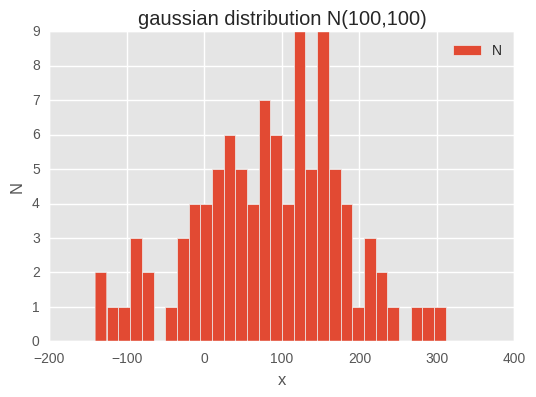

In [267]:
distribution = ['gauss']
md = {}
# md is an empty disctionary
md['gauss'] = np.random.normal(mymean,mystd,size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
plt.hist(md['gauss'], bins = 30,label='N')
plt.ylabel('N')
plt.xlabel('x')
plt.legend(loc="upper right")
plt.title("gaussian distribution N(100,100)")
plt.show()

### Figure 1: normal distribution: mean = 100, standard deviation = 100, N=100

In [268]:
print("gauss mean: {}, standard deviation: {}".format(md['gauss'].mean(),md['gauss'].std()))

gauss mean: 83.0502772841, standard deviation: 93.7894642044


In [269]:
md['gauss'] = {}
for n in mysize:
    md['gauss'][n] = np.random.normal(mymean,mystd,size=n)

md['gauss']['means'] = {}

for nn in md['gauss']:
    if type(nn) != str:
        md['gauss']['means'][nn] = md['gauss'][nn].mean()

In [270]:
data = zip(*md['gauss']['means'].items())

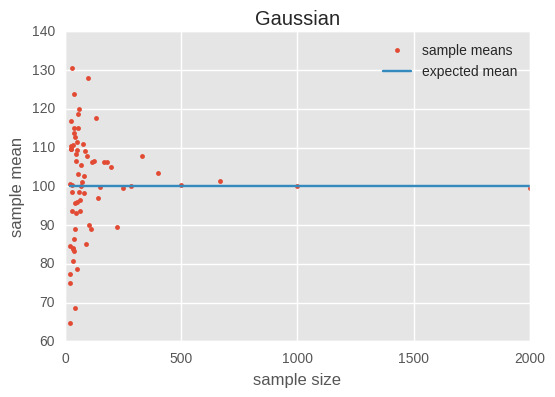

In [271]:
plt.plot(data[0],data[1],'.',label='sample means')
plt.xlabel("sample size")
plt.ylabel("sample mean")
plt.title("Gaussian")
plt.plot([min(mysize),max(mysize)],[mymean,mymean],label='expected mean')
plt.legend(loc="upper right")
plt.show()

### Figure 2: I could see that in gaussian distribution, when the sample size gets bigger, the sample mean is also getting closer to my mean: 100 just like the law of large numbers.

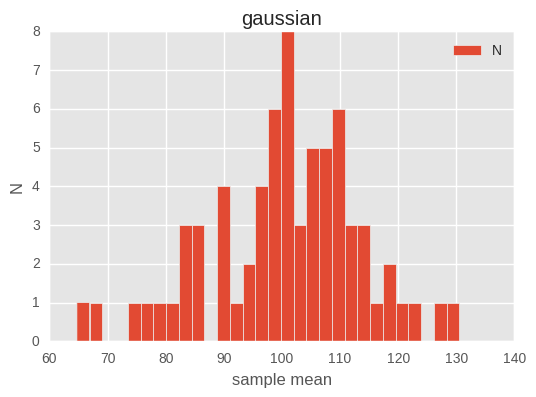

In [272]:
allmeans = [x for x in md['gauss']['means'].values()]
plt.hist(allmeans,bins=30,label='N')
plt.xlabel("sample mean")
plt.ylabel("N")
plt.title("gaussian")
plt.legend()
plt.show()

## Figure 3: The most frequent sample mean is in the range between 90 and 110 which is close to 100, my mean.

In [273]:
np.std(allmeans)

13.178858541531252

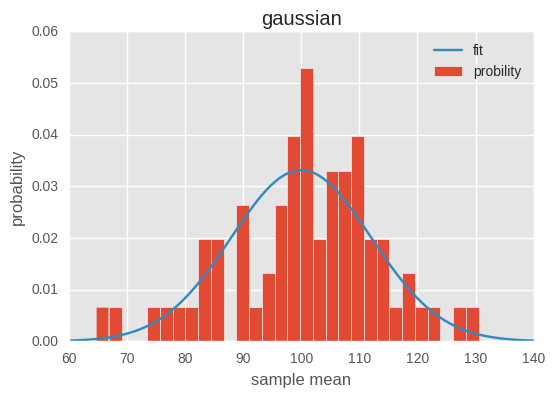

In [274]:
plt.hist(allmeans,bins=30,normed=True,label='probility')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mymean, mystd/np.sqrt(len(allmeans)))
plt.plot(x,y,label='fit')
plt.xlabel("sample mean")
plt.ylabel("probability")
plt.title("gaussian")
plt.legend()
plt.show()

## Figure 4: Fit the gaussian distribution of sample means 

# Do it for the Poisson distribution

In [275]:
distribution = ['pois']

In [276]:
lamda = mymean

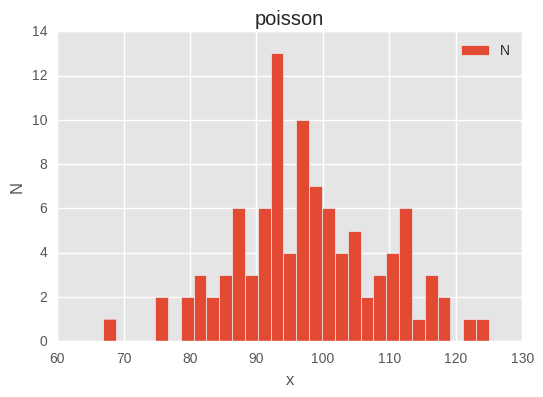

In [277]:
md['pois'] = np.random.poisson(lam=lamda,size=100)

plt.hist(md['pois'],bins=30,label='N')
plt.xlabel("x")
plt.ylabel("N")
plt.title("poisson")
plt.legend()
plt.show()

# Figure 1: Poisson distribution with lamda 100, N = 100

In [278]:
md['pois'] = {}
for n in mysize:
    md['pois'][n] = np.random.poisson(lam = lamda, size = n)
md['pois']['means'] = {}
for n in md['pois']:
    if type(n) != str:
        md['pois']['means'][n] = md['pois'][n].mean()

In [279]:
data = zip(*md['pois']['means'].items())

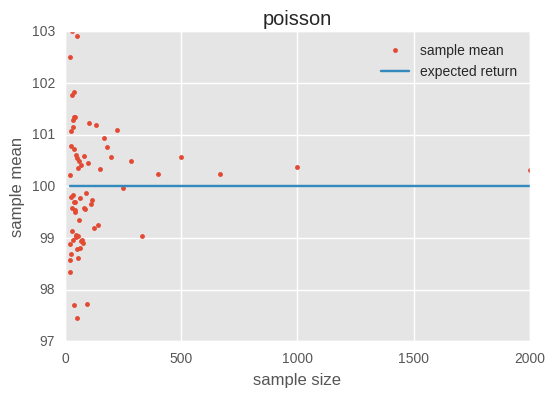

In [280]:
plt.plot(data[0],data[1],'.',label='sample mean')
plt.xlabel("sample size")
plt.ylabel("sample mean")
plt.title("poisson")
plt.plot([min(mysize),max(mysize)],[lamda,lamda],label='expected return')
plt.legend()
plt.show()

## Figure 2: We could see from this figure that when sample size gets bigger, the sample mean tends to reach the mean, which is the lamda: 100 just like the law of large numbers.

In [281]:
allmeans = [x for x in md['pois']['means'].values()]

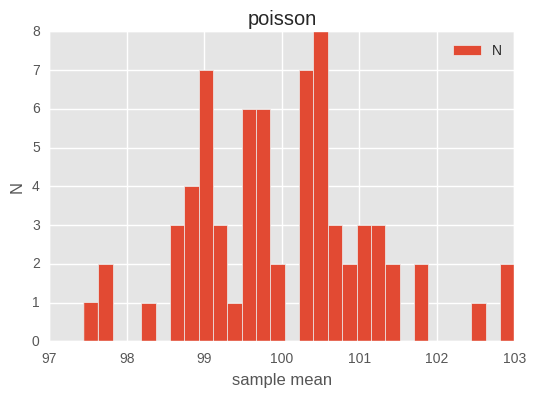

In [282]:
plt.hist(allmeans,bins = 30,label='N')
plt.xlabel("sample mean")
plt.ylabel("N")
plt.legend()
plt.title("poisson")
plt.show()

## Figure 3: The most frequent sample mean is located between 99 and 101 which is close to the expected mean lamda 100.

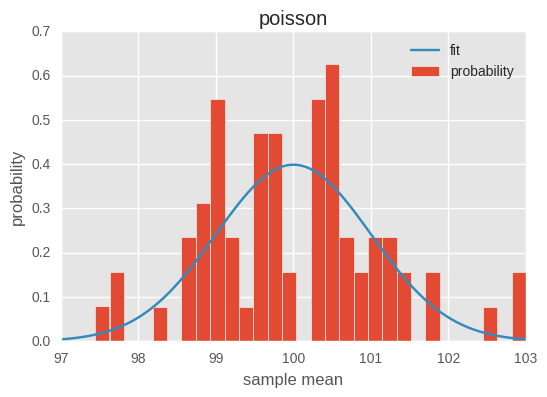

In [283]:
plt.hist(allmeans,bins=30,normed=True,label='probability')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, lamda,np.sqrt(lamda/len(allmeans)) )
plt.plot(x,y,label='fit')
plt.xlabel("sample mean")
plt.ylabel("probability")
plt.title("poisson")
plt.legend()
plt.show()

## Figure 4: Fit the gaussian distribution of sample means 

# Do it for the Binomial distribution

In [284]:
distribution = ['binomial']

In [285]:
n = 300
p = mymean/float(n)

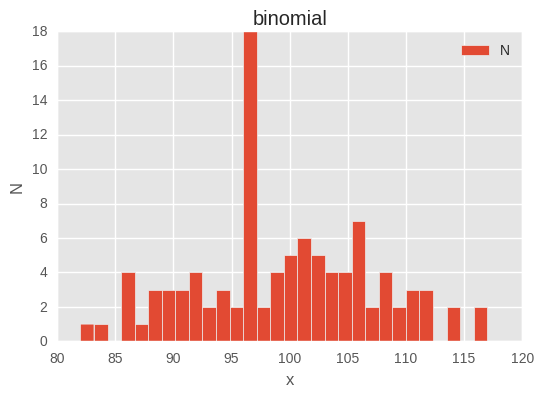

In [286]:
md['binomial'] = np.random.binomial(n,p,size=100)

plt.hist(md['binomial'],bins=30,label='N')
plt.xlabel('x')
plt.ylabel('N')
plt.title('binomial')
plt.legend()
plt.show()

# Figure 1: Binomial distribution with n = 300, p = 1/3, N = 100

In [287]:
md['binomial'] = {}
for nn in mysize:
    md['binomial'][nn] = np.random.binomial(n,p,nn)
md['binomial']['means'] = {}
for nn in md['binomial']:
    if type(nn) != str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()

In [288]:
data = zip(*md['binomial']['means'].items())

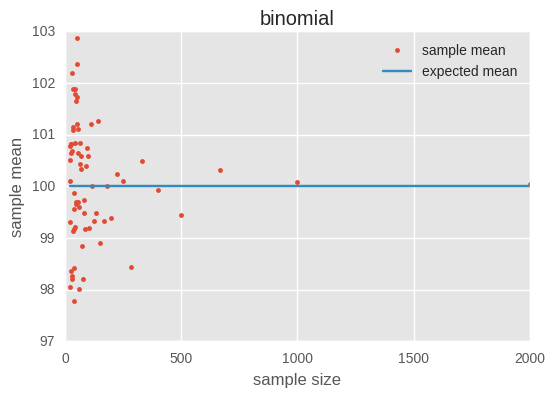

In [289]:
plt.plot(data[0],data[1],'.',label='sample mean')
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.title('binomial')
plt.plot([min(mysize),max(mysize)],[mymean,mymean],label='expected mean')
plt.legend()
plt.show()

## Figure 2: We could see from this figure that when sample size gets bigger, the sample mean tends to reach the sample mean, which is the expected mean n*p: 100 just like the law of large numbers.

In [290]:
allmeans = [x for x in md['binomial']['means'].values()]

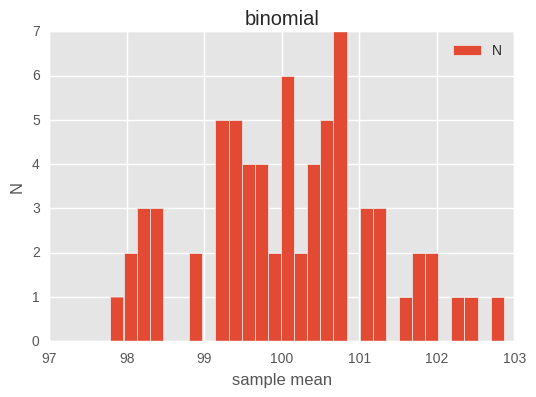

In [291]:
plt.hist(allmeans,bins = 30,label='N')
plt.xlabel('sample mean')
plt.ylabel('N')
plt.legend()
plt.title('binomial')
plt.show()

## Figure 3: The most frequent sample mean is located between 99 and 101 which is close to the expected mean 100.

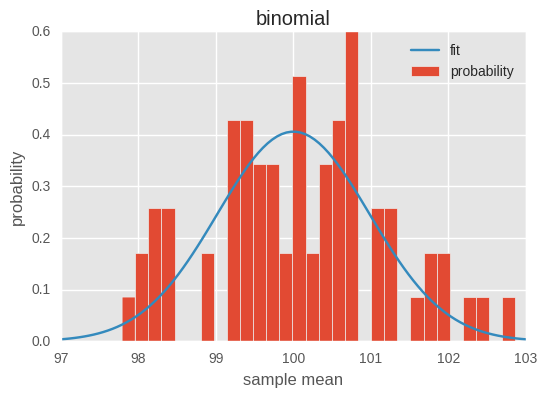

In [292]:
plt.hist(allmeans,bins = 30,label='probability',normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
y = norm.pdf(x,n*p,np.sqrt(n*p*(1-p)/len(allmeans)))
plt.plot(x,y,label='fit')
plt.xlabel('sample mean')
plt.ylabel('probability')
plt.legend()
plt.title('binomial')
plt.show()

## Figure 4: Fit the gaussian distribution of the sample means

# Do it for another distribution

In [293]:
distribution = ['gamma']

In [294]:
shape = 100
scale = mymean/float(shape)

In [295]:
md['gamma'] = np.random.gamma(shape,scale,size= 100)

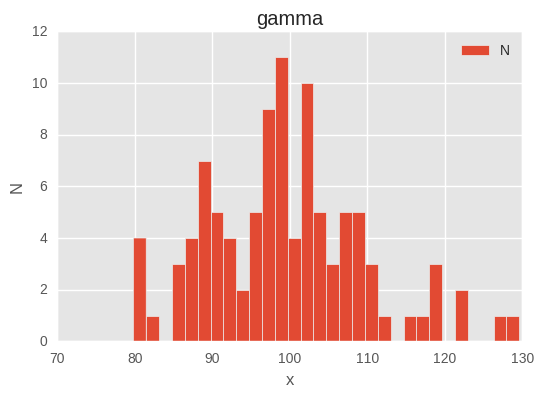

In [296]:
plt.hist(md['gamma'],bins=30,label='N')
plt.xlabel('x')
plt.ylabel('N')
plt.legend()
plt.title('gamma')
plt.show()

# Figure 1: Gamma distribution with shape = 100, scale = 1.0, N = 100

In [297]:
md['gamma'] = {}
for n in mysize:
    md['gamma'][n] = np.random.gamma(shape,scale,n)
md['gamma']['means'] = {}
for n in md['gamma']:
    if type(n) != str:
        md['gamma']['means'][n] = md['gamma'][n].mean()

In [298]:
data = zip(*md['gamma']['means'].items())

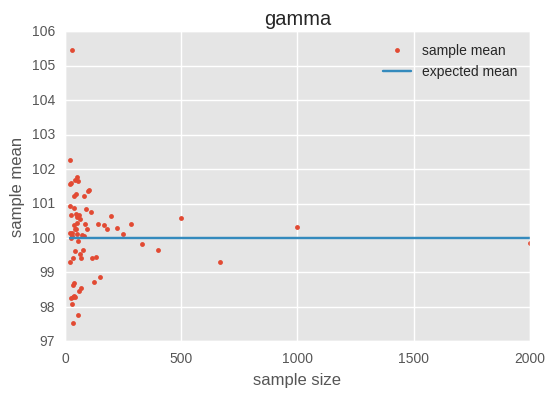

In [299]:
plt.plot(data[0],data[1],'.',label='sample mean')
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.title('gamma')
plt.plot([min(mysize),max(mysize)],[mymean,mymean],label='expected mean')
plt.legend()
plt.show()

## Figure 2: We could see from this figure that when sample size gets bigger, the sample mean tends to reach the sample mean, which is the expected mean shape*scale: 100 just like the law of large numbers.

In [300]:
allmeans = [x for x in md['gamma']['means'].values()]

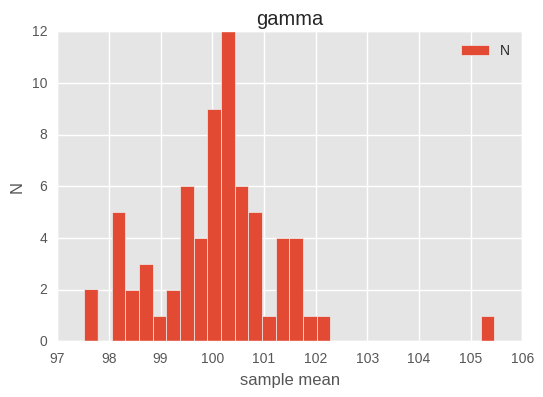

In [301]:
plt.hist(allmeans,bins=30,label='N')
plt.xlabel('sample mean')
plt.ylabel('N')
plt.title('gamma')
plt.legend()
plt.show()

## Figure 3: The most frequent sample mean is located between 99 and 101 which is close to the expected mean 100.

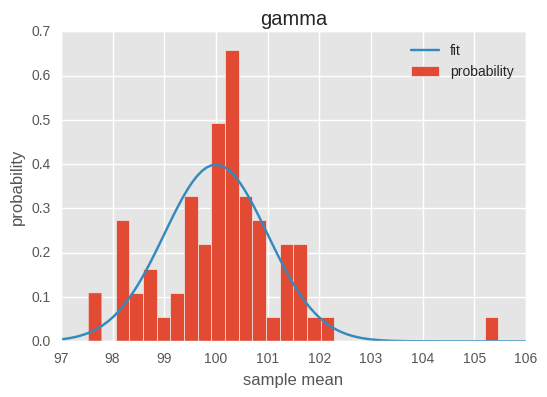

In [302]:
plt.hist(allmeans,bins=30,label='probability',normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
y = norm.pdf(x,mymean,scale*np.sqrt(shape/len(allmeans)))
plt.plot(x,y,label='fit')
plt.xlabel('sample mean')
plt.ylabel('probability')
plt.title('gamma')
plt.legend()
plt.show()

## Figure 4: Fit the gaussion distribution of the sample means.